# Problem Statement

- To comprehend which consumer attributes and loan attributes influence the tendency of default.<br>
- To find which customer are more likely to default on their loan payment.<br>
- Find the key features for making the descision

### Import necessary libraries and settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# for ignoring unnecessary warning 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# for seeing all columns, for large dataset with large number of columns
pd.options.display.max_columns = 200

In [4]:
# loading application data 
app_data = pd.read_csv('application_data.csv')

### Check basic structure of data 

In [5]:
# check first 3 rows of data to see what does data look like
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Describe numerical data columns
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# Shape data frame
app_data.shape

(307511, 122)

In [8]:
# data type, columns and non-null values in dataset
app_data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### Data Quality Check

#### Missing Value Checks and treatment

In [9]:
# Creating dataframe for missing value columns
mis_col_per = (app_data.isnull().mean()*100).reset_index().rename({'index':'Column_Names',0:'Missing_per'}, axis = 1)

#### We will take 45% missing values as threshold, as we are assuming columns having 45% missing value won't provide much value to our analysis

In [10]:
# Storing columns that has missing more than 45 %
drop_cols_45 = list(mis_col_per[mis_col_per['Missing_per']>45]['Column_Names'])

In [11]:
# Dropping all the columns that has more than 45% missing values
app_data.drop(labels=drop_cols_45, axis = 1, inplace=True)

In [12]:
# finding index of columns with less than 1% missing values
def find_mis_idx_1per(data):
    isna_ser = data.isnull().mean()*100
    col_1per = isna_ser[(isna_ser<1) & (isna_ser>0)].index
    idx_list = []
    for i in col_1per:
        idx_sub_list = list(data[data.loc[:,i].isnull()].index)
        idx_list += idx_sub_list
    return set(idx_list)

In [13]:
# indexes that has less than 1% missing values we can remove those rows
idx_mis = find_mis_idx_1per(app_data)

In [14]:
# removing rows with missing values from idx_mis list 
app_data.drop(labels=idx_mis, axis = 0, inplace=True)

In [15]:
# Finding updated list of missing value columns
upadated_mis_per = (app_data.isnull().mean()*100).reset_index().rename({'index':'Column_Names',0:'Missing_per'}, axis = 1)

In [16]:
# list of columns that has missing values less than 15% and we will impute these.
imp_cols_less15 = list(upadated_mis_per[(upadated_mis_per['Missing_per']<15) & (upadated_mis_per['Missing_per']>0)]['Column_Names'])

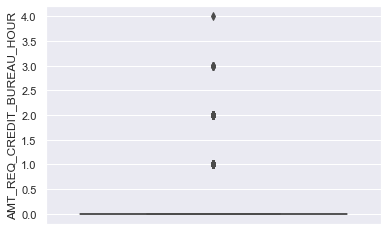

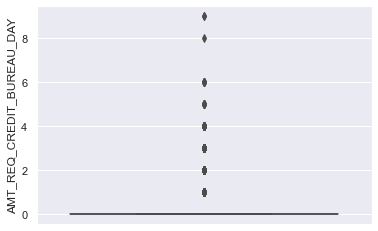

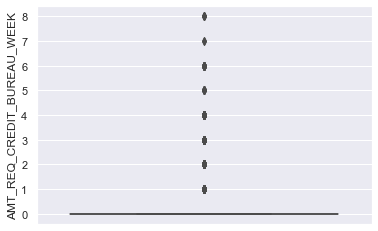

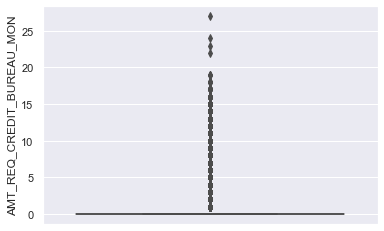

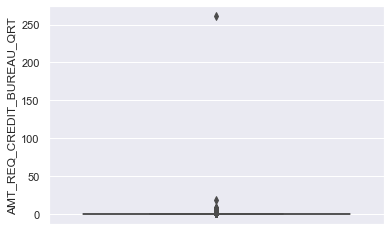

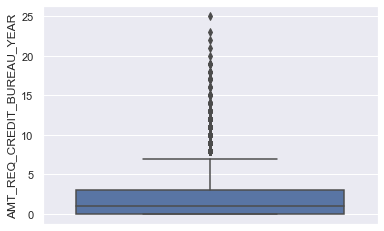

In [17]:
# plotting distribution of all the variables from imp_cols_less15, so we can choose between mean or median for imputation.
for i in imp_cols_less15:
    sns.boxplot(y = i, data = app_data)
    plt.show()

#### As we can for all the columns outlier is present so we should impute null values by median. As median is less affected by outliers

In [18]:
# Imputing columns by median value
for i in imp_cols_less15:
    app_data[i].fillna(value = app_data[i].median(), axis = 0, inplace = True)

In [19]:
# verifying if values had imputed or not
app_data[imp_cols_less15].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

#### Check Constant or Quasi Constant Features and remove those Feature
Constant : 100% of valuse in a column are single value
Quasi Constant : Almost all the values in a column are a single value

In [20]:
# We will be removing quasi constant columns threshold will be taken as 98% 
quasi_const_cols = []
for i in app_data.columns:
    if (app_data[i].value_counts(normalize=True).iloc[0]>0.98):
         quasi_const_cols.append(i)

In [21]:
app_data.drop(labels = quasi_const_cols, axis = 1, inplace = True)

#### Dividing columns in Numerical and Categorical


In [22]:
# Dividing Numerical and Object dtype columns
num_col = list(app_data.select_dtypes(exclude='object').columns)
obj_col = list(app_data.select_dtypes(include='object').columns)
id_col = ['SK_ID_CURR']

In [23]:
# I had to divide these columns manually will add these columns to obj columns to creating categorical column list

num_cat_col = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
             'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',  'FLAG_DOCUMENT_3','TARGET']

In [24]:
# Final Categorical columns
cat_col = obj_col + num_cat_col

In [25]:
# Final numerical columns that are either continuous or discrete
numerical_col = []
for i in num_col:
    if (i not in num_cat_col) and (i not in id_col):
        numerical_col.append(i)

In [26]:
len(cat_col), len(numerical_col)

(25, 25)

### Need to Check data sanity if there is any issue with that we need rectify that

In [27]:
# check for numrical columns
app_data[numerical_col].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0,10,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,11,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,9,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,17,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,11,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,1,0.0,0.0,0.0,0.0


#### As we can see all the columns that has days in them should be positive but they are negative. we need to correct that

In [28]:
# find the columns with days in them. because only they has positive negative issue
neg_cols = []
for i in numerical_col:
    if "DAYS" in i:
        neg_cols.append(i)

In [29]:
# apply absolute function on neg_cols
app_data[neg_cols] = app_data[neg_cols].apply(abs)

In [30]:
# check if results are reflecting
app_data[neg_cols].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


### Now we need to check for outlier presence in numerical columns

In [31]:
# create a function to get a list of function that has outliers
def find_outCol(data):
    out_list = []
    for col in data.columns:
        IQR = data[col].describe()['75%'] - data[col].describe()['25%']
        lower_bound = data[col].describe()['25%'] - 1.5*IQR
        upper_bound = data[col].describe()['75%'] + 1.5*IQR
        
        for val in data[col]:
            if val < lower_bound :
                out_list.append(col)
                break
            elif val > upper_bound :
                out_list.append(col)
                break
            else : 
                continue
    return out_list  

In [32]:
outlier_col = find_outCol(app_data[numerical_col])

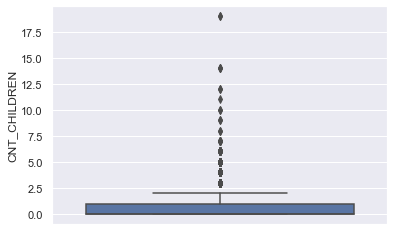

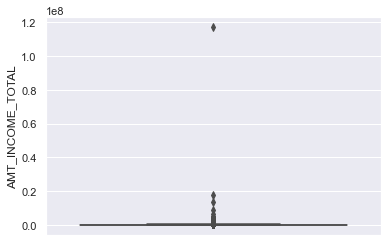

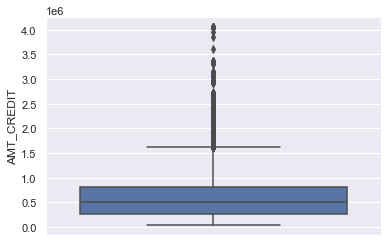

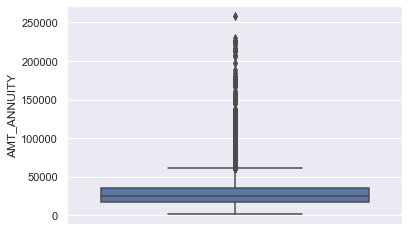

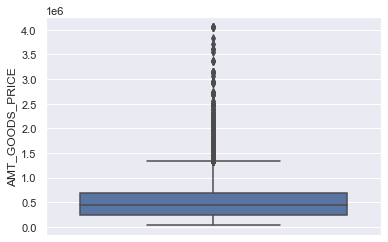

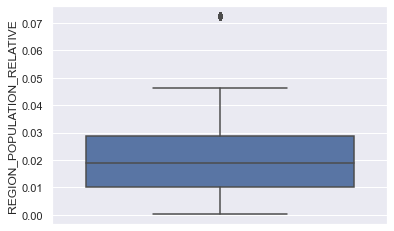

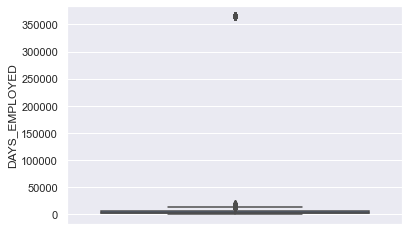

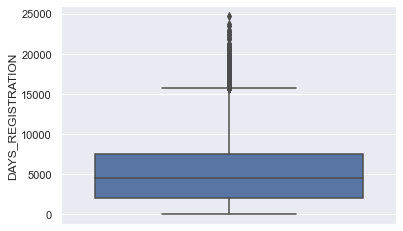

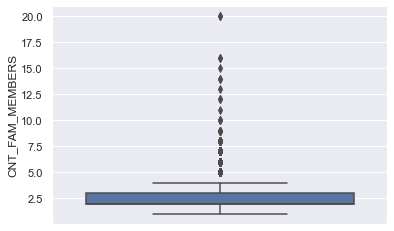

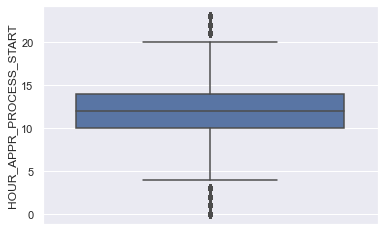

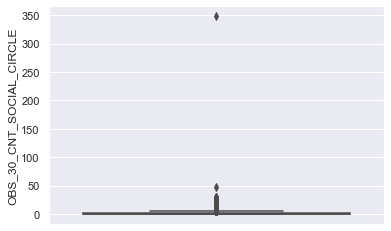

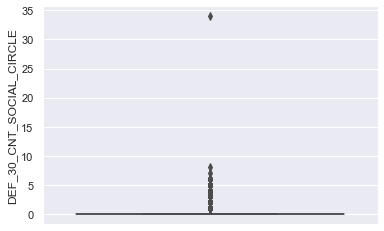

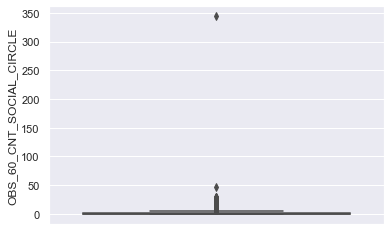

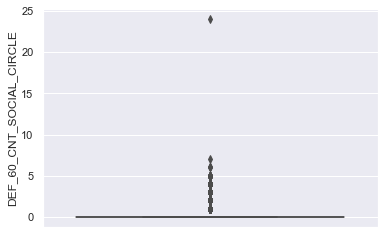

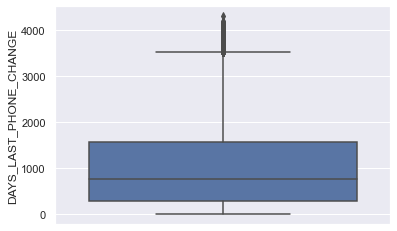

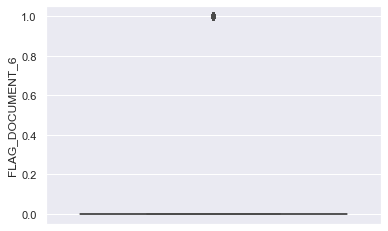

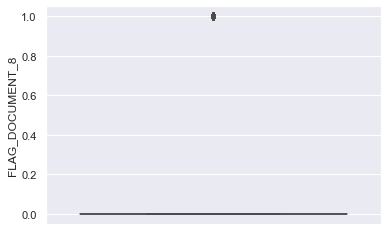

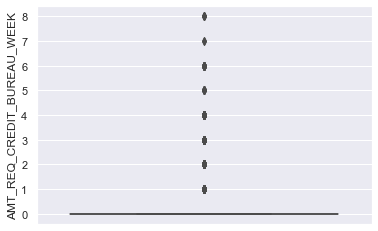

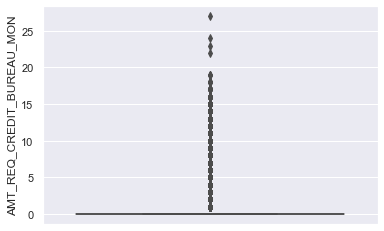

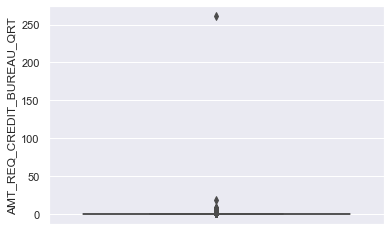

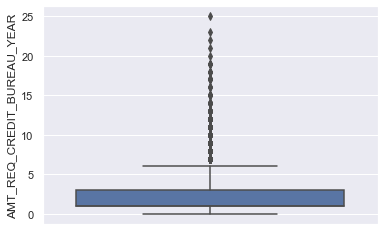

In [33]:
for i in outlier_col:
    sns.boxplot(y = i, data = app_data)
    plt.show()

#### From both fucntion and boxplot. We can find outliers in numerical columns, But still in those few columns are there that has continuous values even in outliers.For example AMT_CREDIT,AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE   

#### For further analysis we can take example of 5 columns to see effect of outlier and distribution those variable.

In [34]:
out_analysis = ['AMT_INCOME_TOTAL','DAYS_EMPLOYED','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT']
app_data[out_analysis].describe(percentiles=[0.01,0.25,0.5,0.75,0.9,0.99, 0.999])

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT
count,3.045310e+05,304531.000000,304531.000000,304531.000000,304531.000000
mean,1.686634e+05,67743.609127,1.422052,0.100069,0.230203
std,2.378910e+05,139457.579884,2.401424,0.362388,0.745648
min,2.565000e+04,0.000000,0.000000,0.000000,0.000000
1%,4.500000e+04,116.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,934.000000,0.000000,0.000000,0.000000
50%,1.476000e+05,2221.000000,0.000000,0.000000,0.000000
75%,2.025000e+05,5713.500000,2.000000,0.000000,0.000000
90%,2.700000e+05,365243.000000,4.000000,0.000000,1.000000
99%,4.545000e+05,365243.000000,10.000000,2.000000,2.000000


#### Analysis of DAYS_EMPLOYED column

In [35]:
app_data[app_data['DAYS_EMPLOYED']==365243.000000].shape[0]/app_data.shape[0]

0.1801195937359415

In [36]:
app_data['DAYS_EMPLOYED'].describe(percentiles=[0.01,0.25,0.5,0.75,0.9,0.99, 0.999])

count    304531.000000
mean      67743.609127
std      139457.579884
min           0.000000
1%          116.000000
25%         934.000000
50%        2221.000000
75%        5713.500000
90%      365243.000000
99%      365243.000000
99.9%    365243.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### Result : 
As almost 20% of data in DAYS_EMPLOYED is in outlier and we can see that is also a absurd value of approximately 1000 years. So this can be because of impution in case of missing values. We can either impute them with np.NaN or we can go one move futher and impute np.NaN with median.

#### Analysis of OBS_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE column

In [37]:
app_data[app_data['OBS_30_CNT_SOCIAL_CIRCLE']>=300].shape[0]/app_data.shape[0]

3.283737944577071e-06

In [38]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.25,0.5,0.75,0.9,0.99, 0.999])

count    304531.000000
mean          1.422052
std           2.401424
min           0.000000
1%            0.000000
25%           0.000000
50%           0.000000
75%           2.000000
90%           4.000000
99%          10.000000
99.9%        17.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [39]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.25,0.5,0.75,0.9,0.99, 0.999])

count    304531.000000
mean          0.100069
std           0.362388
min           0.000000
1%            0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           0.000000
99%           2.000000
99.9%         3.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### Result :
In thess columns outlier values are in very low quantity. These are truly rare case of this field. We can treat it by using flooring (impute by lower bound) or capping (impute by upper bound).<br>
lower bound = Q1 - (1.5\*IQR) <br>
upper bound = Q3 + (1.5\*IQR)<br>
IQR = Q3 - Q1

#### Analysis of AMT_INCOME_TOTAL column

In [40]:
app_data['AMT_INCOME_TOTAL'].describe(percentiles=[0.01,0.25,0.5,0.75,0.9,0.99, 0.999])

count    3.045310e+05
mean     1.686634e+05
std      2.378910e+05
min      2.565000e+04
1%       4.500000e+04
25%      1.125000e+05
50%      1.476000e+05
75%      2.025000e+05
90%      2.700000e+05
99%      4.545000e+05
99.9%    9.000000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### Result : 
When we see differnce between 99.9 percentile and max values in column there is a differnece of is a huge difference but there are only 0.01% of people have values in between then these are rare case. we can analyse them further to check their effect on TARGET.<br>
We can treat it by using flooring (impute by lower bound) or capping (impute by upper bound).

#### Analysis of  AMT_REQ_CREDIT_BUREAU_QRT columns

In [41]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe(percentiles=[0.01,0.25,0.5,0.75,0.9,0.99, 0.999])

count    304531.000000
mean          0.230203
std           0.745648
min           0.000000
1%            0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           1.000000
99%           2.000000
99.9%         4.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

#### Result : 
These are also similar to other two column above explained are rare cases<br>
We can treat it by using flooring (impute by lower bound) or capping (impute by upper bound).

#### Note :
There are other variables also that has outliers, some of them even they have outliers, the oulier values are itself continuous with not that big of differnece between them. So we keep those in general(will depend on columns also).<br>
But for some columns we need to treat outliers so we can use either flooring (if values are below lower bound) or capping (if values are below upper bound).

#### Finding top 10 Correlation when takin in consideration that Target = 1 or 0

Dividing data in target 1 and  target 0

In [88]:
app_target1 = app_data[app_data['TARGET']==1]
app_target0 = app_data[app_data['TARGET']==0]

In [89]:
# we are finding correlation of datafrme where target is 1 
data1_corr = abs(app_target1.corr()).unstack()

In [96]:
# TOp 10 correlation in dataset with target = 1
data1_corr[data1_corr != 1].sort_values(ascending = False)[0:20:2]

FLAG_EMP_PHONE               YEARS_EMPLOYED                0.999703
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998286
AMT_CREDIT                   AMT_GOODS_PRICE               0.983065
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956477
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.885556
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.869761
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847260
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778110
AMT_ANNUITY                  AMT_GOODS_PRICE               0.752206
AMT_CREDIT                   AMT_ANNUITY                   0.751400
dtype: float64

Now move to Target = 0

In [91]:
# we are finding correlation of datafrme where target is 0
data0_corr = abs(app_target0.corr()).unstack()

In [95]:
# Top 10 correlation in dataset with target = 0
data0_corr[data0_corr != 1].sort_values(ascending = False)[0:20:2]

YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999755
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998513
AMT_CREDIT                   AMT_GOODS_PRICE                0.987260
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949905
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878681
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861303
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859458
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830488
AMT_GOODS_PRICE              AMT_ANNUITY                    0.775838
AMT_CREDIT                   AMT_ANNUITY                    0.770379
dtype: float64

#### Result :
- For both target We have same pair of features in list and order is almost same except these 2 pairs (LIVE_REGION_NOT_WORK_REGION ,REG_REGION_NOT_WORK_REGION), (DEF_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE).
- Most of correlation makes sense, as years of employed will after if we have a employee pone or not. All amount column correlating to each other. While credit and goods price has most correlation as we would take loan for goods.
- Number of children will increase number of family members
- We can take one feature out of pair we can do our analysis. As we can correlate one column from other.

### Relevence of column in predicting TARGET
Here I want to use only those column that have high correlation with Target variable. So We can more focus on the feature are more relevant to TARGET.
But as Target is also a categorical variable we should use pointbiserialr scipy.stats function (Point Biserial Correlation)

In [42]:
# pointbiserialr does not work with columns with null values we will keep this column
pcorr_col = [i for i in num_col if i not in 'EXT_SOURCE_3']

In [43]:
# calculating correlation of all the columns with TARGET variable.
from scipy.stats import pointbiserialr
corr_dic = {}
for i in pcorr_col:
    corr_dic[i] = pointbiserialr(app_data[i],app_data['TARGET'])[0]
pcorr = abs(pd.Series(corr_dic)).sort_values(ascending = False)

In [44]:
cols_to_keep = list(pcorr[pcorr>0.04].index)


In [45]:
# here we would would add EXT_SOURCE_3 back to cols_to_keep
cols_to_keep = cols_to_keep + ['EXT_SOURCE_3']

Lets check if for any continuous column do we need to do binning

In [46]:
app_data[['DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_2,EXT_SOURCE_3
count,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,3.045310e+05,244280.000000
mean,16040.509915,965.330085,2994.732070,67743.609127,4986.687785,5.142203e-01,0.510764
std,4361.978717,826.943447,1509.373915,139457.579884,3521.601095,1.911246e-01,0.194843
min,7489.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527
25%,12418.000000,276.000000,1721.000000,934.000000,2012.000000,3.921081e-01,0.370650
50%,15755.000000,761.000000,3255.000000,2221.000000,4505.000000,5.658110e-01,0.535276
75%,19682.000000,1572.000000,4299.000000,5713.500000,7478.000000,6.635463e-01,0.669057
max,25229.000000,4292.000000,7197.000000,365243.000000,24672.000000,8.549997e-01,0.896010


Here In my opinion We do not need Binning in with these features.
But As we see it is hard to understand days related column in days we can convert those in years

#### Convert days columns to years

In [47]:
days_col = ['DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION']
app_data[days_col] = app_data[days_col].apply(lambda x : round(x/365,2))
app_data.rename({'DAYS_BIRTH':'YEARS_BIRTH'
                 ,'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'
                 ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'
                 ,'DAYS_EMPLOYED':'YEARS_EMPLOYED'
                 ,'DAYS_REGISTRATION':'YEARS_REGISTRATION'},axis = 1, inplace =True)

In [48]:
def get_catInfo(data):
    cat_info = pd.DataFrame(columns = ['column', 'values',  'values_count'])
    temp = pd.DataFrame()

    for c in data.columns:
        temp['column'] = [c]
        temp['values'] = [data[c].unique()]
        temp['values_count'] = int(data[c].nunique())
        cat_info = cat_info.append(temp)
    return cat_info

In [49]:
app_cat_info = get_catInfo(app_data[obj_col])
app_cat_info

,column,values,values_count
0,NAME_CONTRACT_TYPE,"[Cash loans, Revolving loans]",2
0,CODE_GENDER,"[M, F, XNA]",3
0,FLAG_OWN_CAR,"[N, Y]",2
0,FLAG_OWN_REALTY,"[Y, N]",2
0,NAME_TYPE_SUITE,"[Unaccompanied, Family, Spouse, partner, Child...",7
0,NAME_INCOME_TYPE,"[Working, State servant, Commercial associate,...",8
0,NAME_EDUCATION_TYPE,"[Secondary / secondary special, Higher educati...",5
0,NAME_FAMILY_STATUS,"[Single / not married, Married, Civil marriage...",5
0,NAME_HOUSING_TYPE,"[House / apartment, Rented apartment, With par...",6
0,OCCUPATION_TYPE,"[Laborers, Core staff, Accountants, Managers, ...",18


#### Group Small categories in a one collective category
If we have many small category then those categories won't be much helpful in analysis 

NAME_TYPE_SUITE column

In [50]:
# checking % of each category
(app_data['NAME_TYPE_SUITE'].value_counts(normalize=True)*100)

Unaccompanied      81.145105
Family             13.124772
Spouse, partner     3.714893
Children            1.066886
Other_B             0.576953
Other_A             0.283715
Group of people     0.087676
Name: NAME_TYPE_SUITE, dtype: float64

In [51]:
# We can club ['Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people'] to 'OTHER'
app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].replace(
    to_replace=['Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']
    , value='OTHER')

NAME_INCOME_TYPE Column

In [52]:
# checking % of each category
(app_data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100)

Working                 51.666661
Commercial associate    23.246894
Pensioner               18.008347
State servant            7.061350
Unemployed               0.006239
Student                  0.005582
Businessman              0.003284
Maternity leave          0.001642
Name: NAME_INCOME_TYPE, dtype: float64

In [53]:
# We can club ['State servant', 'Unemployed', 'Student', 'Businessman', 'Maternity leave'] to StateSer_and_Other
app_data['NAME_INCOME_TYPE'] = app_data['NAME_INCOME_TYPE'].replace(
    to_replace=['State servant', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
    ,value='StateServent_and_Other')

NAME_EDUCATION_TYPE Column

In [54]:
# checking % of each category
(app_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100)

Secondary / secondary special    71.119853
Higher education                 24.240882
Incomplete higher                 3.341203
Lower secondary                   1.244537
Academic degree                   0.053525
Name: NAME_EDUCATION_TYPE, dtype: float64

In [55]:
# We can club ['Incomplete higher', 'Lower secondary', 'Academic degree'] to Other
app_data['NAME_EDUCATION_TYPE'] = app_data['NAME_EDUCATION_TYPE'].replace(
    to_replace=['Incomplete higher', 'Lower secondary', 'Academic degree'],
    value = 'Other')

NAME_FAMILY_STATUS Column

In [56]:
# checking % of each category
(app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100)

Married                 63.921243
Single / not married    14.736102
Civil marriage           9.681116
Separated                6.432186
Widow                    5.229353
Name: NAME_FAMILY_STATUS, dtype: float64

In [57]:
# Here value % is not that much low but we can club ['Separated', 'Widow'] tp 'Separated/Widow'
app_data['NAME_FAMILY_STATUS'] = app_data['NAME_FAMILY_STATUS'].replace(
    to_replace=['Separated', 'Widow'],
    value = 'Separated/Widow')

NAME_HOUSING_TYPE Column

In [58]:
# checking % of each category
(app_data['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100)

House / apartment      88.740719
With parents            4.824796
Municipal apartment     3.638053
Rented apartment        1.585717
Office apartment        0.848190
Co-op apartment         0.362525
Name: NAME_HOUSING_TYPE, dtype: float64

In [59]:
# With housing type column we can club ['With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment'] to Other_Apartment
app_data['NAME_HOUSING_TYPE'] = app_data['NAME_HOUSING_TYPE'].replace(
    to_replace=['With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment'],
    value = 'Other_Apartment')

OCCUPATION_TYPE Column

In [60]:
# checking % of each category
(app_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100)

Laborers                 26.174580
Sales staff              15.203543
Core staff               13.038509
Managers                 10.097754
Drivers                   8.826568
High skill tech staff     5.385565
Accountants               4.638061
Medicine staff            4.045510
Security staff            3.188488
Cooking staff             2.820714
Cleaning staff            2.207120
Private service staff     1.257317
Low-skill Laborers        0.993324
Waiters/barmen staff      0.638463
Secretaries               0.618376
Realty agents             0.354861
HR staff                  0.266863
IT staff                  0.244385
Name: OCCUPATION_TYPE, dtype: float64

In [61]:
# Here we can replace all categories that are less than 5% 
#['Accountants', 'Medicine staff','Security staff', 'Cooking staff', 'Cleaning staff','Private service staff', 'Low-skill Laborers'
#, 'Waiters/barmen staff','Secretaries', 'Realty agents', 'HR staff', 'IT staff'] to Other  
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].replace(
    to_replace=['Accountants', 'Medicine staff','Security staff', 'Cooking staff', 'Cleaning staff','Private service staff', 'Low-skill Laborers'
                ,'Waiters/barmen staff','Secretaries', 'Realty agents', 'HR staff', 'IT staff'],
    value = 'Other_Occupation')

WEEKDAY_APPR_PROCESS_START Column

In [62]:
# checking % of each category
(app_data['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)*100)

TUESDAY      17.534832
WEDNESDAY    16.884324
MONDAY       16.505052
THURSDAY     16.445616
FRIDAY       16.363851
SATURDAY     11.002164
SUNDAY        5.264160
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

#### Note :
WEEKDAY_APPR_PROCESS_START Column seems pretty balanced and no small category, we can leave it as it as

ORGANIZATION_TYPE Column

In [63]:
# checking % of each category
(app_data['ORGANIZATION_TYPE'].value_counts(normalize=True)*100)

Business Entity Type 3    22.089705
XNA                       18.011959
Self-employed             12.493966
Other                      5.433273
Medicine                   3.637725
Business Entity Type 2     3.434133
Government                 3.384877
School                     2.897242
Trade: type 7              2.551136
Kindergarten               2.240494
Construction               2.186641
Business Entity Type 1     1.943644
Transport: type 4          1.757785
Trade: type 3              1.130591
Industry: type 9           1.092828
Industry: type 3           1.068528
Security                   1.055722
Housing                    0.963777
Industry: type 11          0.881684
Military                   0.857056
Bank                       0.806158
Agriculture                0.799919
Police                     0.761499
Transport: type 2          0.717168
Postal                     0.701735
Security Ministries        0.641314
Trade: type 2              0.614387
Restaurant                 0

In [64]:
# As there are 58 catergories in this Feature, almost all are less than 5%, here we will take 3% as threshold. 
#['School', 'Trade: type 7','Kindergarten', 'Construction', 'Business Entity Type 1','Transport: type 4', 'Trade: type 3', 'Industry: type 9',
#'Industry: type 3', 'Security', 'Housing', 'Industry: type 11','Military', 'Bank', 'Agriculture', 'Police', 'Transport: type 2',
#'Postal', 'Security Ministries', 'Trade: type 2', 'Restaurant','Services', 'University', 'Industry: type 7', 'Transport: type 3',
#'Industry: type 1', 'Hotel', 'Electricity', 'Industry: type 4','Trade: type 6', 'Insurance', 'Industry: type 5', 'Telecom',
#'Emergency', 'Industry: type 2', 'Advertising', 'Realtor', 'Culture','Industry: type 12', 'Trade: type 1', 'Mobile', 'Legal Services',
#'Cleaning', 'Transport: type 1', 'Industry: type 6','Industry: type 10', 'Religion', 'Industry: type 13', 'Trade: type 4','Trade: type 5', 'Industry: type 8']
# to Extra_Types (Other is already present in Feature's category)
app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].replace(
    to_replace=['School', 'Trade: type 7','Kindergarten', 'Construction', 'Business Entity Type 1','Transport: type 4', 'Trade: type 3', 'Industry: type 9',
                'Industry: type 3', 'Security', 'Housing', 'Industry: type 11','Military', 'Bank', 'Agriculture', 'Police', 'Transport: type 2',
                'Postal', 'Security Ministries', 'Trade: type 2', 'Restaurant','Services', 'University', 'Industry: type 7', 'Transport: type 3',
                'Industry: type 1', 'Hotel', 'Electricity', 'Industry: type 4','Trade: type 6', 'Insurance', 'Industry: type 5', 'Telecom',
                'Emergency', 'Industry: type 2', 'Advertising', 'Realtor', 'Culture','Industry: type 12', 'Trade: type 1', 'Mobile', 'Legal Services',
                'Cleaning', 'Transport: type 1', 'Industry: type 6','Industry: type 10', 'Religion', 'Industry: type 13', 'Trade: type 4','Trade: type 5', 'Industry: type 8']
    ,value = 'Extra_Type')

With we have handled all categorical(object) features

#### Need to again separate Categorical and Numerical variables

In [65]:
new_cat_col =  ['TARGET','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'
                , 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3'] + obj_col
new_num_col = [ 'EXT_SOURCE_2','YEARS_BIRTH', 'YEARS_LAST_PHONE_CHANGE', 'YEARS_ID_PUBLISH', 'YEARS_EMPLOYED'
               , 'YEARS_REGISTRATION', 'EXT_SOURCE_3']

In [66]:
len(new_cat_col), len(new_num_col)

(19, 7)

In [67]:
new_app_data = app_data[new_cat_col + new_num_col].copy()

#### Check balance of TARGET variable

In [68]:
# Checking if data is imbalance by value counts % 
(new_app_data['TARGET'].value_counts(normalize=True)*100)

0    91.900004
1     8.099996
Name: TARGET, dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

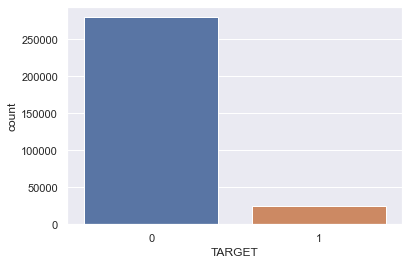

In [69]:
# making countplot of target
sns.countplot(data = new_app_data, x = 'TARGET')

As data is imblance we need to check each variable separatly via dividing dataset to Defaulter (Target = 1) and Non-Defaulter (Target = 0)

#### Divide app_data dataframe into TARGET 1 & 0 like app_data1 and app_data0

In [71]:
app_data1 = new_app_data[new_app_data['TARGET']==1]
app_data0 = new_app_data[new_app_data['TARGET']==0]

In [72]:
app_data1.head(3)

,TARGET,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,YEARS_BIRTH,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_EMPLOYED,YEARS_REGISTRATION,EXT_SOURCE_3
0,1,2,2,0,1,0,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,0.262949,25.92,3.11,5.81,1.75,9.99,0.139376
26,1,2,3,0,1,0,1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Separated/Widow,House / apartment,Other_Occupation,MONDAY,Business Entity Type 3,0.548477,51.30,0.44,5.01,7.20,18.01,0.190706
40,1,2,2,0,1,0,1,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,0.306841,47.90,2.95,2.82,3.46,3.24,0.320163


In [73]:
app_data0.head(3)

,TARGET,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,YEARS_BIRTH,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_EMPLOYED,YEARS_REGISTRATION,EXT_SOURCE_3
1,0,1,1,0,1,0,1,Cash loans,F,N,N,Family,StateServent_and_Other,Higher education,Married,House / apartment,Core staff,MONDAY,Extra_Type,0.622246,45.93,2.27,0.80,3.25,3.25,NaN
2,0,2,2,0,1,0,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,0.555912,52.18,2.23,6.93,0.62,11.67,0.729567
3,0,2,2,0,1,0,1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,0.650442,52.07,1.69,6.68,8.33,26.94,NaN


# Univariate Analysis

### Numerical Variable

In [72]:
new_num_col = [ 'EXT_SOURCE_2','YEARS_BIRTH', 'YEARS_LAST_PHONE_CHANGE', 'YEARS_ID_PUBLISH', 'YEARS_EMPLOYED'
               , 'YEARS_REGISTRATION', 'EXT_SOURCE_3']

EXT_SOURCE_2

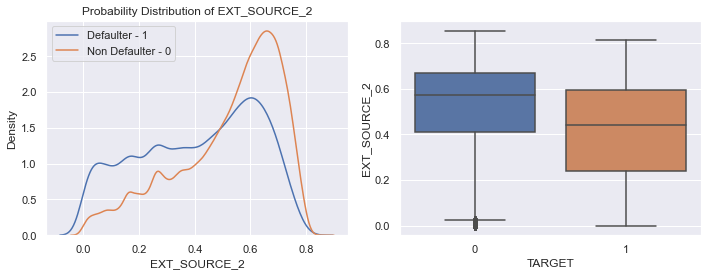

In [136]:
# Distribution of 'EXT_SOURCE_2' Feature
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Probability Distribution of EXT_SOURCE_2')
sns.distplot(a=app_data1['EXT_SOURCE_2'], label='Defaulter - 1 ', hist=False)
sns.distplot(a=app_data0['EXT_SOURCE_2'], label='Non Defaulter - 0', hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y = 'EXT_SOURCE_2', x = 'TARGET', data = new_app_data)
plt.tight_layout()
plt.show()

#### Result :
- With EXT_SOURCE_2 we can easily distinguish Defaulter and Non Defaulter.
- Non Defaulter have higher EXT_SOURCE_2 and also spread of values are also small in comparison to Defaulter
- But Non Defaulter have lower value until 0.5 (approx). We can see peak for both Targets at 0.6(approx) but Non 
    Defaulter has at higher side
- EXT_SOURCE_2 can be good feature to distinguish between Defaulter and Non-Defaulter

YEARS_BIRTH

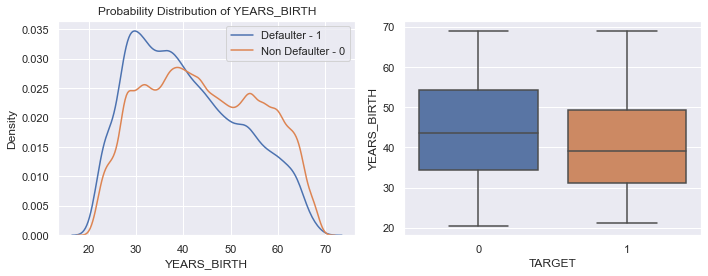

In [139]:
# Distribution of 'YEARS_BIRTH' Feature
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Probability Distribution of YEARS_BIRTH')
sns.distplot(a=app_data1['YEARS_BIRTH'], label='Defaulter - 1 ', hist=False)
sns.distplot(a=app_data0['YEARS_BIRTH'], label='Non Defaulter - 0', hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y = 'YEARS_BIRTH', x = 'TARGET', data = new_app_data)
plt.tight_layout()
plt.show()

#### Result :
- People more than 40 years of age are less likely to default compare to people less than 40 years. 
- Non Defaulter seems to higher age range also.

YEARS_LAST_PHONE_CHANGE

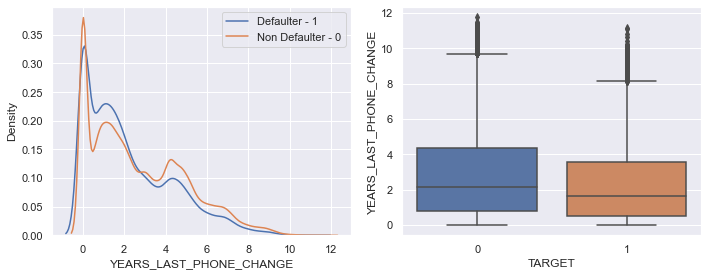

In [75]:
# Distribution of 'YEARS_LAST_PHONE_CHANGE' Feature
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Probability Distribution of YEARS_LAST_PHONE_CHANGE')
sns.distplot(a=app_data1['YEARS_LAST_PHONE_CHANGE'], label='Defaulter - 1 ', hist=False)
sns.distplot(a=app_data0['YEARS_LAST_PHONE_CHANGE'], label='Non Defaulter - 0', hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y = 'YEARS_LAST_PHONE_CHANGE', x = 'TARGET', data = new_app_data)
plt.tight_layout()
plt.show()

#### Result :
- YEARS_LAST_PHONE_CHANGE does not seems to that much high of effect on Target, both has similar distribution graph.
- But Non Defaulter seems to have slightly higher range between Q1 and Q3
- This does not seem like a good feature in prediction.

YEARS_ID_PUBLISH

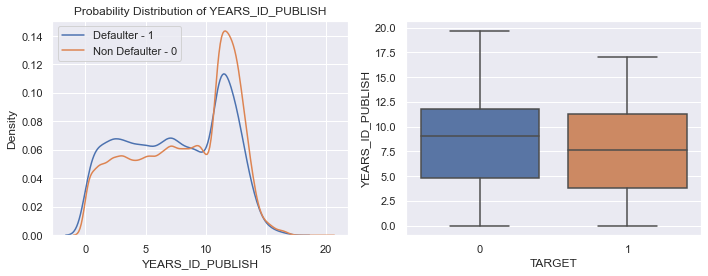

In [137]:
# Distribution of 'YEARS_ID_PUBLISH' Feature
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Probability Distribution of YEARS_ID_PUBLISH')
sns.distplot(a=app_data1['YEARS_ID_PUBLISH'], label='Defaulter - 1 ', hist=False)
sns.distplot(a=app_data0['YEARS_ID_PUBLISH'], label='Non Defaulter - 0', hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y = 'YEARS_ID_PUBLISH', x = 'TARGET', data = new_app_data)
plt.tight_layout()
plt.show()

#### Result ;
- There isn't any much difference between Defaulter or Non-Defaulter until 10 but after that we peak between 10 to  13 but Non Defaulter has higher peak
- Distribution of values is also similar for both type of targets

YEARS_EMPLOYED

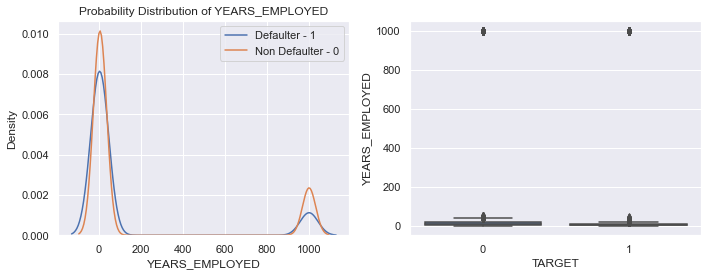

In [138]:
# Distribution of 'YEARS_EMPLOYED' Feature
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Probability Distribution of YEARS_EMPLOYED')
sns.distplot(a=app_data1['YEARS_EMPLOYED'], label='Defaulter - 1 ', hist=False)
sns.distplot(a=app_data0['YEARS_EMPLOYED'], label='Non Defaulter - 0', hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y = 'YEARS_EMPLOYED', x = 'TARGET', data = new_app_data)
plt.tight_layout()
plt.show()

#### Result :
- Most Applicant either have years employed around 0 or 1000 (this can be because of imputation of missing value)
- There also Non Defaulter has higher % of values.

YEARS_REGISTRATION

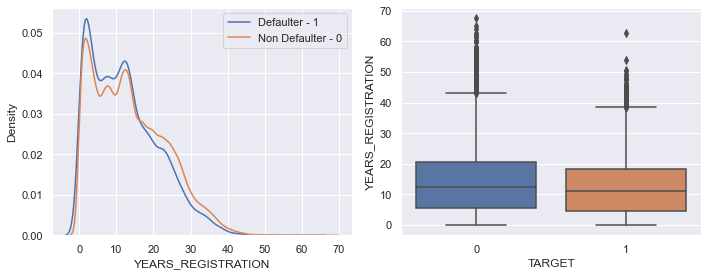

In [78]:
# Distribution of 'YEARS_REGISTRATION' Feature
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Probability Distribution of YEARS_REGISTRATION')
sns.distplot(a=app_data1['YEARS_REGISTRATION'], label='Defaulter - 1 ', hist=False)
sns.distplot(a=app_data0['YEARS_REGISTRATION'], label='Non Defaulter - 0', hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y = 'YEARS_REGISTRATION', x = 'TARGET', data = new_app_data)
plt.tight_layout()
plt.show()

#### Result :
- For YEARS_REGISTRATION both targets have similar distribution.
- Non Defaulter does seems to have higher number of outliers

EXT_SOURCE_3

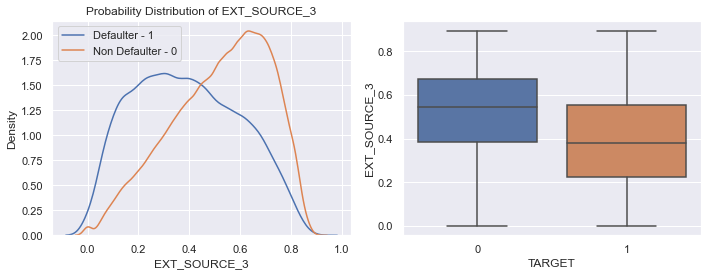

In [140]:
# Distribution of 'EXT_SOURCE_3' Feature
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Probability Distribution of EXT_SOURCE_3')
sns.distplot(a=app_data1['EXT_SOURCE_3'], label='Defaulter - 1 ', hist=False)
sns.distplot(a=app_data0['EXT_SOURCE_3'], label='Non Defaulter - 0', hist=False)
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y = 'EXT_SOURCE_3', x = 'TARGET', data = new_app_data)
plt.tight_layout()
plt.show()

#### Result :
- With this feature we can easily differentiate between Defaulter and Non-Defaulter
- Before 0.45 Deafulter have higher number Applicants, after 0.45 Non-Defaulter have more applicants


### Result of Numerical Variable Analysis :
- From Univariate Analysis EXT_SOURCE_3, EXT_SOURCE_2, YEARS_BIRTH. As these features shows good relation with target variable. We will take these to Bivariate, Multivariate Analysis.

#### Categorical Variables

REGION_RATING_CLIENT_W_CITY

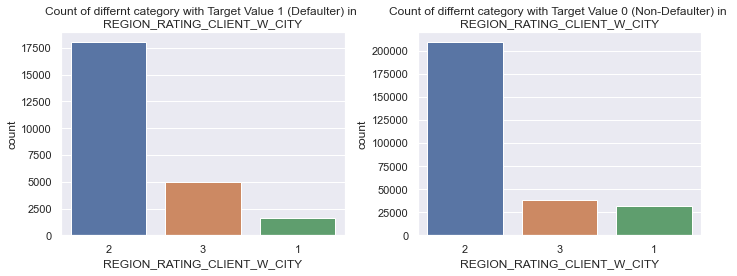

In [80]:
# Count Distribution of REGION_RATING_CLIENT_W_CITY considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'REGION_RATING_CLIENT_W_CITY', data = app_data1
             ,order = app_data1['REGION_RATING_CLIENT_W_CITY'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \nREGION_RATING_CLIENT_W_CITY")
plt.subplot(1,2,2)
sns.countplot(x = 'REGION_RATING_CLIENT_W_CITY', data = app_data0
             ,order = app_data0['REGION_RATING_CLIENT_W_CITY'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non-Defaulter) in \nREGION_RATING_CLIENT_W_CITY")
plt.tight_layout()
plt.show()

#### Result :
- Deafulter seems to have higher values in 3rd category while in Non-Defaulter both 3 and 1 have similar number of applicants.

REGION_RATING_CLIENT

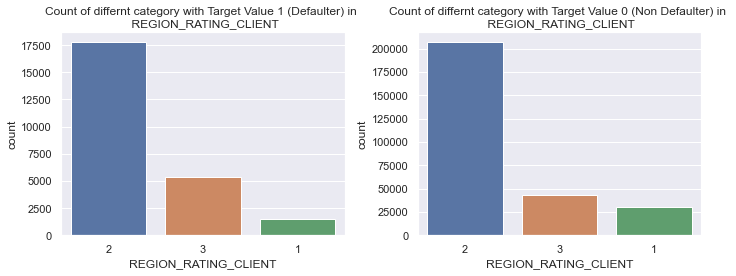

In [81]:
# Count Distribution of REGION_RATING_CLIENT considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'REGION_RATING_CLIENT', data = app_data1
             ,order = app_data1['REGION_RATING_CLIENT'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n REGION_RATING_CLIENT")
plt.subplot(1,2,2)
sns.countplot(x = 'REGION_RATING_CLIENT', data = app_data0
             ,order = app_data0['REGION_RATING_CLIENT'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non Defaulter) in \n REGION_RATING_CLIENT")
plt.tight_layout()
plt.show()

#### Result :
- Similar to REGION_RATING_CLIENT_W_CITY , REGION_RATING_CLIENT Feature Deafulter seems to have higher values in 3rd category while in Non-Defaulter both 3 and 1 have similar number of applicants.

In [82]:
(new_app_data['REGION_RATING_CLIENT'] != new_app_data['REGION_RATING_CLIENT_W_CITY']).sum()

5684

REG_CITY_NOT_WORK_CITY

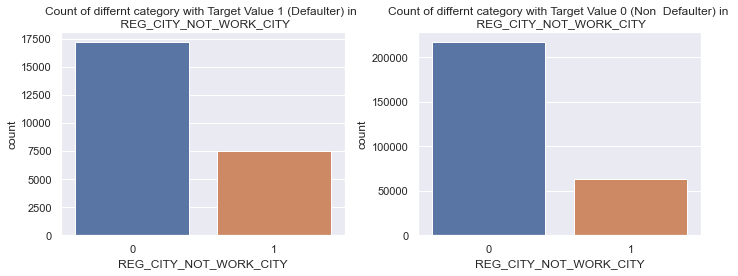

In [83]:
# Count Distribution of REG_CITY_NOT_WORK_CITY considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'REG_CITY_NOT_WORK_CITY', data = app_data1
             ,order = app_data1['REG_CITY_NOT_WORK_CITY'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n REG_CITY_NOT_WORK_CITY")
plt.subplot(1,2,2)
sns.countplot(x = 'REG_CITY_NOT_WORK_CITY', data = app_data0
             ,order = app_data0['REG_CITY_NOT_WORK_CITY'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n REG_CITY_NOT_WORK_CITY")
plt.tight_layout()
plt.show()

#### Result :
- When we compare both categories in REG_CITY_NOT_WORK_CITY category 1 where registered city is not work city has higher number in Defaulter than Non Defaulter.
- If your register city is not your work city there is little bit higher changes of Defaulting.

REG_CITY_NOT_LIVE_CITY

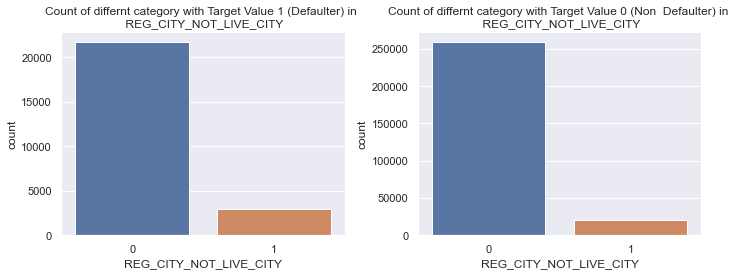

In [84]:
# Count Distribution of REG_CITY_NOT_LIVE_CITY considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'REG_CITY_NOT_LIVE_CITY', data = app_data1
             ,order = app_data1['REG_CITY_NOT_LIVE_CITY'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n REG_CITY_NOT_LIVE_CITY")
plt.subplot(1,2,2)
sns.countplot(x = 'REG_CITY_NOT_LIVE_CITY', data = app_data0
             ,order = app_data0['REG_CITY_NOT_LIVE_CITY'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n REG_CITY_NOT_LIVE_CITY")
plt.tight_layout()
plt.show()

#### Result :
- When we compare both categories in REG_CITY_NOT_LIVE_CITY category 1 where registered city is not live city has higher number in Defaulter than Non Defaulter.
- If your register city is not your live city there is little bit higher changes of Defaulting.

FLAG_EMP_PHONE

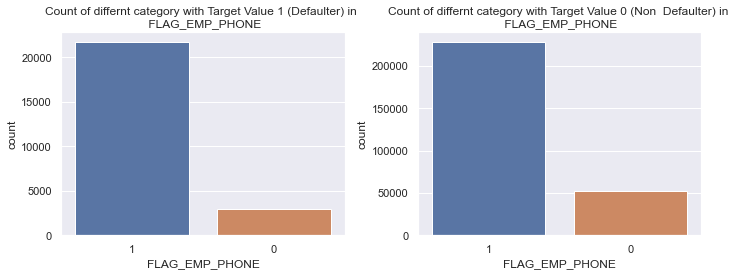

In [85]:
# Count Distribution of FLAG_EMP_PHONE considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_EMP_PHONE', data = app_data1
             ,order = app_data1['FLAG_EMP_PHONE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n FLAG_EMP_PHONE")
plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_EMP_PHONE', data = app_data0
             ,order = app_data0['FLAG_EMP_PHONE'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n FLAG_EMP_PHONE")
plt.tight_layout()
plt.show()

#### Result :
- When we compare both categories in FLAG_EMP_PHONE category 0 where Applicant has employee phone, has higher number in Non Defaulter than Defaulter.
- If Applicant does not have a Employee phone there is little bit higher changes of Defaulting.

FLAG_DOCUMENT_3

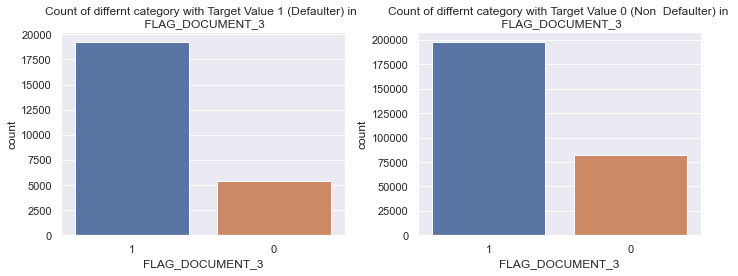

In [86]:
# Count Distribution of FLAG_DOCUMENT_3 considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_DOCUMENT_3', data = app_data1
             ,order = app_data1['FLAG_DOCUMENT_3'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n FLAG_DOCUMENT_3")
plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_DOCUMENT_3', data = app_data0
             ,order = app_data0['FLAG_DOCUMENT_3'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n FLAG_DOCUMENT_3")
plt.tight_layout()
plt.show()

#### Result :
- When we compare both categories in FLAG_DOCUMENT_3 category 0 where Applicant has filled Document 3, has higher number in Non Defaulter than Defaulter.
- If Applicant does not fill a Document 3 there is little bit higher changes of Defaulting.

NAME_CONTRACT_TYPE

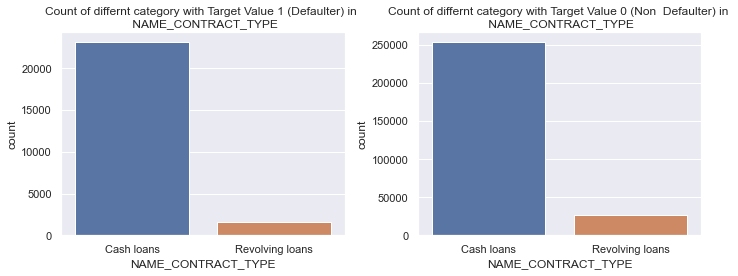

In [87]:
# Count Distribution of NAME_CONTRACT_TYPE considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_data1
             ,order = app_data1['NAME_CONTRACT_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n NAME_CONTRACT_TYPE")
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_data0
             ,order = app_data0['NAME_CONTRACT_TYPE'].value_counts().index) 
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n NAME_CONTRACT_TYPE")
plt.tight_layout()
plt.show()

#### Result :
- When we compare both categories in NAME_CONTRACT_TYPE  in category Revolving Loans has higher number in Non Defaulter than Defaulter.
- Here isn't that much of differnce between both Defaulter and Non-Defaulter

CODE_GENDER

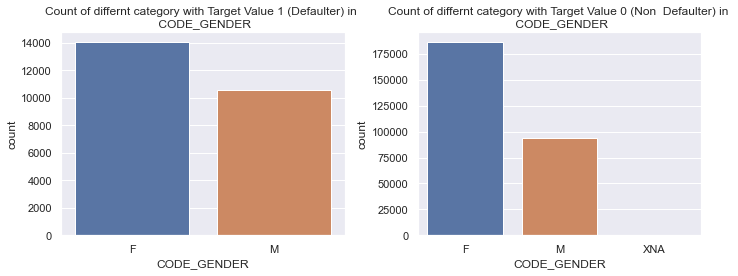

In [88]:
# Count Distribution of CODE_GENDER considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = app_data1
             ,order = app_data1['CODE_GENDER'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n CODE_GENDER")
plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = app_data0
             ,order = app_data0['CODE_GENDER'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n CODE_GENDER")
plt.tight_layout()
plt.show()

#### Result :
- Male are more likely to default on a loan.
- XNA is only chosen by Non Defaulter Applicants

FLAG_OWN_CAR

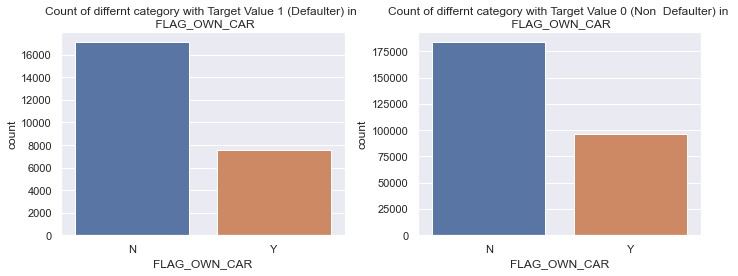

In [89]:
# Count Distribution of FLAG_OWN_CAR considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_data1
             ,order = app_data1['FLAG_OWN_CAR'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n FLAG_OWN_CAR")
plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_data0
             ,order = app_data0['FLAG_OWN_CAR'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n FLAG_OWN_CAR")
plt.tight_layout()
plt.show()

#### Result :
- We can't see a clear refreence but Applicants that have car are more(in term of %) in Non-Defaulter.   

FLAG_OWN_REALTY

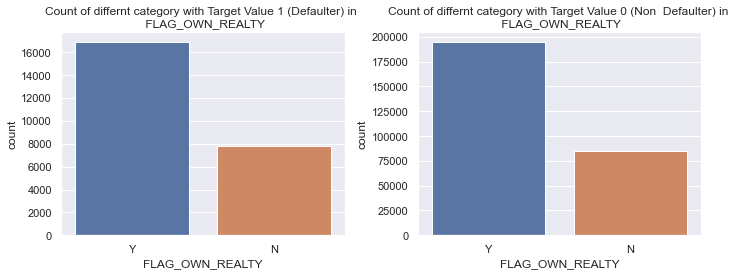

In [90]:
# Count Distribution of FLAG_OWN_REALTY considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_data1
             ,order = app_data1['FLAG_OWN_REALTY'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n FLAG_OWN_REALTY")
plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_data0
             ,order = app_data0['FLAG_OWN_REALTY'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n FLAG_OWN_REALTY")
plt.tight_layout()
plt.show()

#### Result :
- There doesn't seems a clear relation between owning a realty and Defaulting on a loan.

NAME_TYPE_SUITE

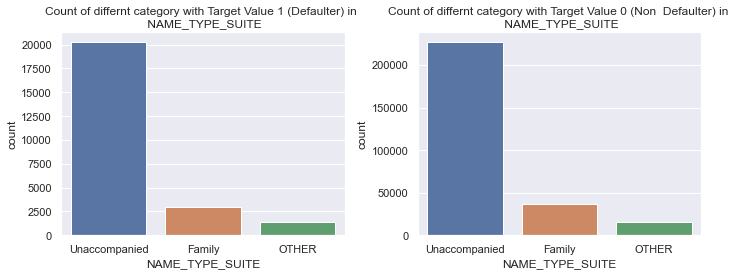

In [91]:
# Count Distribution of NAME_TYPE_SUITE considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_TYPE_SUITE', data = app_data1
             ,order = app_data1['NAME_TYPE_SUITE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n NAME_TYPE_SUITE")
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_TYPE_SUITE', data = app_data0
             ,order = app_data0['NAME_TYPE_SUITE'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n NAME_TYPE_SUITE")
plt.tight_layout()
plt.show()

#### Result :
- There is not a strong relation but people who accompanied with family are more in Non-Defaulter than Defaulter (according to % in that Target category)

NAME_INCOME_TYPE

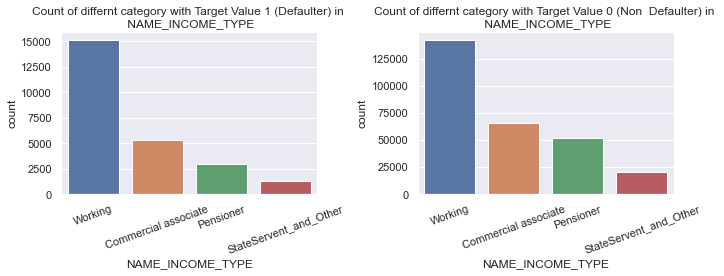

In [92]:
# Count Distribution of NAME_INCOME_TYPE considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_data1
             ,order = app_data1['NAME_INCOME_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n NAME_INCOME_TYPE")
plt.xticks(rotation = 20)
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_data0
             ,order = app_data0['NAME_INCOME_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n NAME_INCOME_TYPE")
plt.xticks(rotation = 20)
plt.tight_layout()
plt.show()

#### Result :
- Pensioner and State Servent & Other are more in Non Defaulter(% of all in Non Defaulter) than Defaulter

NAME_EDUCATION_TYPE

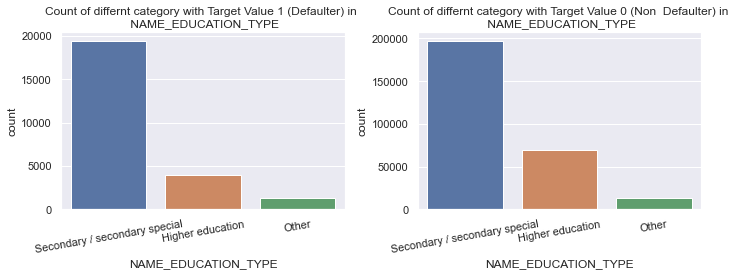

In [93]:
# Count Distribution of NAME_EDUCATION_TYPE considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_data1
             ,order = app_data1['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n NAME_EDUCATION_TYPE")
plt.xticks(rotation = 10)
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_data0
             ,order = app_data0['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n NAME_EDUCATION_TYPE")
plt.xticks(rotation = 10)
plt.tight_layout()
plt.show()

#### Result :
- People who have higher education are less likely to default.

NAME_FAMILY_STATUS

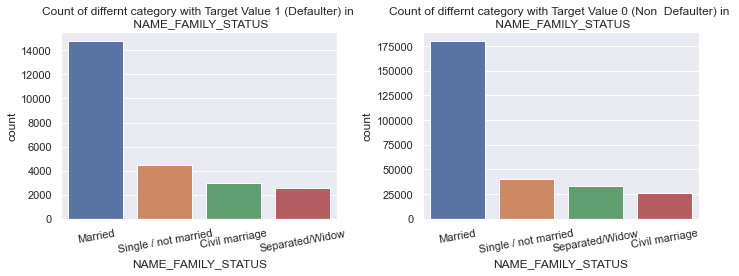

In [94]:
# Count Distribution of NAME_FAMILY_STATUS considering Target Variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_data1
             ,order = app_data1['NAME_FAMILY_STATUS'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n NAME_FAMILY_STATUS")
plt.xticks(rotation = 10)
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_data0
             ,order = app_data0['NAME_FAMILY_STATUS'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n NAME_FAMILY_STATUS")
plt.xticks(rotation = 10)
plt.tight_layout()
plt.show()

#### Result :
- In Non Defaulter and Defaulter There is check in order as there are more applicant in Seperated/Widow section in Non Defaulter while in Defaulter in Civil Marriage.
- Most Applicant are in Married Category. 

NAME_HOUSING_TYPE

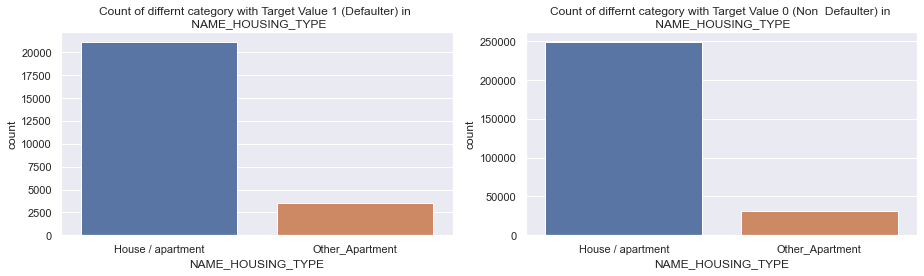

In [95]:
# Count Distribution of NAME_HOUSING_TYPE considering Target Variable
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = app_data1
             ,order = app_data1['NAME_HOUSING_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n NAME_HOUSING_TYPE")
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = app_data0
             ,order = app_data0['NAME_HOUSING_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n NAME_HOUSING_TYPE")
plt.tight_layout()
plt.show()

#### Result :
- Most Applicants belongs to House/ Apartment category.
- There does not seems a clear relation between Target and NAME_HOUSING_TYPE category.

OCCUPATION_TYPE

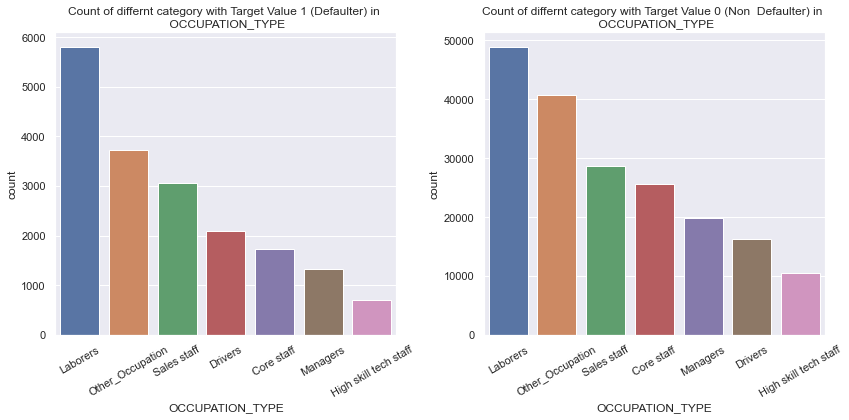

In [96]:
# Count Distribution of OCCUPATION_TYPE considering Target Variable
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x = 'OCCUPATION_TYPE', data = app_data1
             ,order = app_data1['OCCUPATION_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n OCCUPATION_TYPE")
plt.xticks(rotation = 30)
plt.subplot(1,2,2)
sns.countplot(x = 'OCCUPATION_TYPE', data = app_data0
             ,order = app_data0['OCCUPATION_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n OCCUPATION_TYPE")
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

#### Result :
- In both Target values we have similar trend for all occupation except Driver. 
- Drivers are more like to Default on a loan.

WEEKDAY_APPR_PROCESS_START

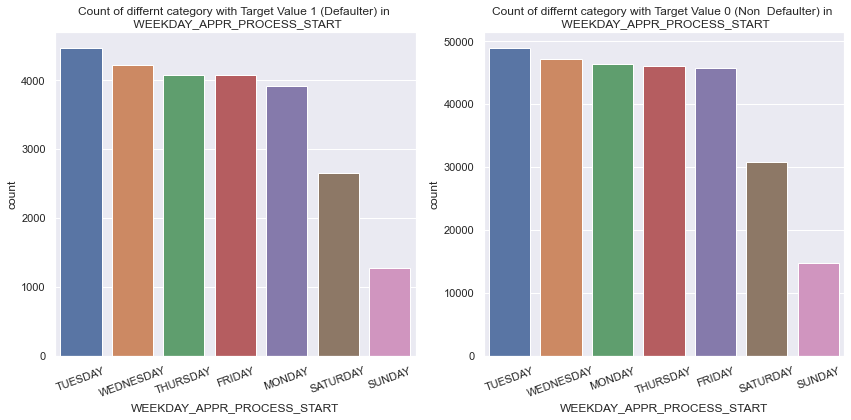

In [97]:
# Count Distribution of WEEKDAY_APPR_PROCESS_START considering Target Variable
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START', data = app_data1
             ,order = app_data1['WEEKDAY_APPR_PROCESS_START'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n WEEKDAY_APPR_PROCESS_START")
plt.xticks(rotation = 20)
plt.subplot(1,2,2)
sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START', data = app_data0
             ,order = app_data0['WEEKDAY_APPR_PROCESS_START'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n WEEKDAY_APPR_PROCESS_START")
plt.xticks(rotation = 20)
plt.tight_layout()
plt.show()

#### Result : 
- All days seems to equal number of application process except Saturday and Sunday that is understandable.
- For both Defaulter and Non Defaulter Trend seems same.

ORGANIZATION_TYPE

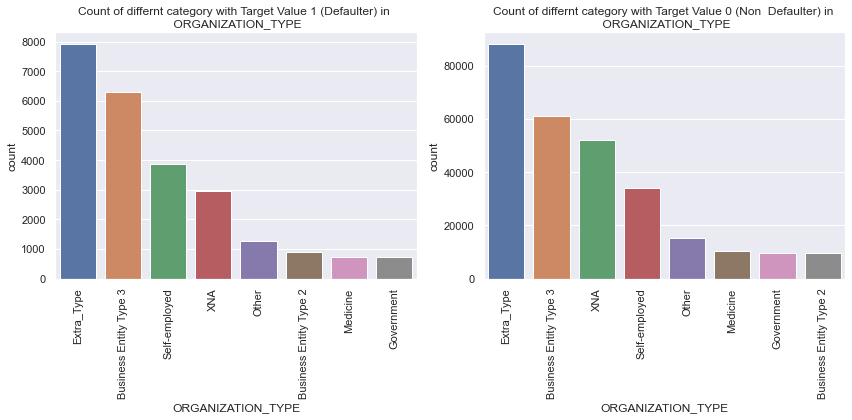

In [98]:
# Count Distribution of ORGANIZATION_TYPE considering Target Variable
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x = 'ORGANIZATION_TYPE', data = app_data1,
             order = app_data1['ORGANIZATION_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 1 (Defaulter) in \n ORGANIZATION_TYPE")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = 'ORGANIZATION_TYPE', data = app_data0
             ,order = app_data0['ORGANIZATION_TYPE'].value_counts().index)
plt.title("Count of differnt category with Target Value 0 (Non  Defaulter) in \n ORGANIZATION_TYPE")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Result : 
- All Organization type of Application have same trend in Defaulter and Non Defaulter. Except people who have XNA are less likely to Default than who have filled Self Employed.

While doing analysis of Categorical columns all the comparison are based on relative to their own Target category, as we cant do direct comparisons as dat ais imbalanced

## Bivariate or Multivariate Analysis

For we need to on which columns it would be helpful to perform further analysis

Numerical Columns : ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'YEARS_BIRTH']

Categorical Columns : ['ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','CODE_GENDER']

#### Checking Correaltion between Numerical Columns

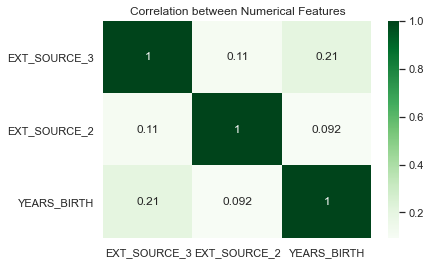

In [141]:
# we can use heatmap to check their relation among themselves
bi_ana_cor = new_app_data[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'YEARS_BIRTH']].corr()
plt.title("Correlation between Numerical Features")
sns.heatmap(data = bi_ana_cor, cmap = "Greens", annot = True)
plt.show()

As all three have very low corelation among themselves

#### Relation between them and Target variable

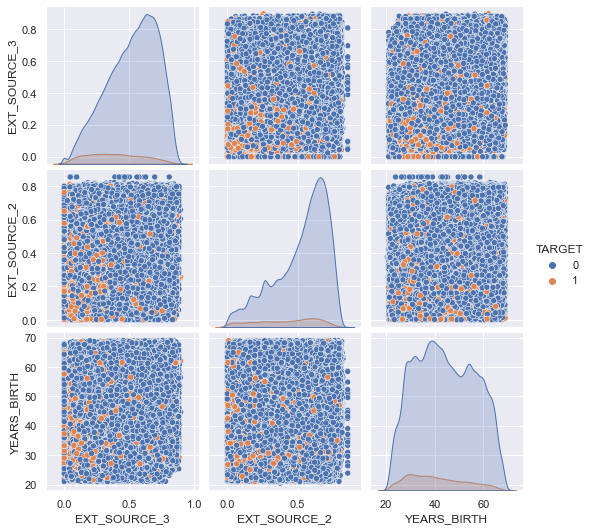

In [100]:
# To show relationship in between all numerical columns (among themselves too) and target
bi_ana_pir = new_app_data[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'YEARS_BIRTH','TARGET']]
sns.pairplot(data = bi_ana_pir, hue = 'TARGET' )
plt.show()

From this graph we can see that defaulter(generally) have low values of EXT_SOURCE2 and EXT_SOURCE3 Score and have age in between 20 to 40

#### Analysis of Categorical Variable

ORGANIZATION_TYPE & CODE_GENDER

In [101]:
pd.pivot_table(index = 'CODE_GENDER', columns= 'ORGANIZATION_TYPE', values = 'TARGET', data = new_app_data)

ORGANIZATION_TYPE,Business Entity Type 2,Business Entity Type 3,Extra_Type,Government,Medicine,Other,Self-employed,XNA
CODE_GENDER,,,,,,,,
F,0.070435,0.080121,0.072836,0.063098,0.065706,0.068753,0.089543,0.049706
M,0.102804,0.110507,0.097726,0.088205,0.068458,0.091251,0.127158,0.073789
XNA,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN


With this we can see as male have higher chance of Default in that for ORGANIZATION_TYPE as self_employed it is much higher.

NAME_FAMILY_STATUS & NAME_EDUCATION_TYPE

In [102]:
pd.pivot_table(index = 'NAME_FAMILY_STATUS', columns= 'NAME_EDUCATION_TYPE', values = 'TARGET', data = new_app_data)

NAME_EDUCATION_TYPE,Higher education,Other,Secondary / secondary special
NAME_FAMILY_STATUS,,,
Civil marriage,0.066778,0.104353,0.108373
Married,0.049875,0.084670,0.084315
Separated/Widow,0.054273,0.083639,0.075543
Single / not married,0.062611,0.101224,0.113829


In Education & Family status highest is for (Secondary / secondary special & Single / not married)

## Working With prev_app dataset

In [103]:
prev_app = pd.read_csv('previous_application.csv')

### Checking Data and data Quality

In [104]:
prev_app.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [105]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [106]:
# get missing values
prev_miss = (prev_app.isna().mean()*100).reset_index().rename({'index':'Col_Name',0:'Missing_per'},axis = 1)

In [107]:
# get columns with missing values greater than 49%
mis_col = list(prev_miss[prev_miss['Missing_per']>49]['Col_Name'])

In [108]:
# Getting Quasi Constant Features
quasi_const_cols = []
for i in prev_app.columns:
    if (prev_app[i].value_counts(normalize=True).iloc[0]>0.98):
         quasi_const_cols.append(i)

In [109]:
# As we can see 1000 yrs == 365243 in days columns. we need to check those also with missing values
prev_days = []
for i in prev_app.columns:
    if 'DAYS' in i:
        prev_days.append(i)     

In [110]:
# Checking missing values
prev_app[prev_days].isna().mean()

DAYS_DECISION                0.000000
DAYS_FIRST_DRAWING           0.402981
DAYS_FIRST_DUE               0.402981
DAYS_LAST_DUE_1ST_VERSION    0.402981
DAYS_LAST_DUE                0.402981
DAYS_TERMINATION             0.402981
dtype: float64

Checking columns which has good amount of values as 365243

In [111]:
prev_app['DAYS_FIRST_DRAWING'].value_counts(normalize = True)*100

 365243.0    93.711572
-228.0        0.012335
-212.0        0.012135
-224.0        0.012135
-223.0        0.011934
               ...    
-1544.0       0.000100
-1887.0       0.000100
-1579.0       0.000100
-1733.0       0.000100
-1895.0       0.000100
Name: DAYS_FIRST_DRAWING, Length: 2838, dtype: float64

In [112]:
prev_app['DAYS_FIRST_DUE'].value_counts(normalize = True)*100

 365243.0    4.076121
-334.0       0.077421
-509.0       0.076217
-208.0       0.075315
-330.0       0.075214
               ...   
-2889.0      0.008625
-2890.0      0.007321
-2891.0      0.005516
-2.0         0.001404
-2892.0      0.000903
Name: DAYS_FIRST_DUE, Length: 2892, dtype: float64

In [113]:
prev_app['DAYS_LAST_DUE_1ST_VERSION'].value_counts(normalize = True)*100

365243.0    9.413237
9.0         0.072206
8.0         0.070802
0.0         0.070702
5.0         0.070401
              ...   
2032.0      0.000100
1800.0      0.000100
1954.0      0.000100
1780.0      0.000100
2098.0      0.000100
Name: DAYS_LAST_DUE_1ST_VERSION, Length: 4605, dtype: float64

In [114]:
prev_app['DAYS_LAST_DUE'].value_counts(normalize = True)*100

 365243.0    21.182491
-245.0        0.065988
-188.0        0.065186
-239.0        0.064384
-167.0        0.063982
               ...    
-2836.0       0.000100
-2834.0       0.000100
-2862.0       0.000100
-2881.0       0.000100
-2861.0       0.000100
Name: DAYS_LAST_DUE, Length: 2873, dtype: float64

In [115]:
prev_app['DAYS_TERMINATION'].value_counts(normalize = True)*100

 365243.0    22.655892
-233.0        0.078825
-170.0        0.077220
-184.0        0.077220
-163.0        0.077120
               ...    
-2797.0       0.000100
-2844.0       0.000100
-2837.0       0.000100
-2815.0       0.000100
-2779.0       0.000100
Name: DAYS_TERMINATION, Length: 2830, dtype: float64

As all these column's 365243.0 + missing values are near to 50% we will remove these columns too as these won't help much in analysis

In [116]:
prev_days = [ 'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']

In [117]:
# Similarily for this column 45% is -1 an invalid value so we can remove this one too. 
prev_app['SELLERPLACE_AREA'].value_counts(normalize = True)*100

-1       45.663310
 0        3.623667
 50       2.239294
 30       2.060993
 20       2.026088
           ...    
 826      0.000060
 959      0.000060
 6624     0.000060
 1217     0.000060
 1023     0.000060
Name: SELLERPLACE_AREA, Length: 2097, dtype: float64

In [118]:
col_to_drop = prev_days + ['SK_ID_PREV','SELLERPLACE_AREA'] + quasi_const_cols + mis_col

In [119]:
prev_app.drop(labels=col_to_drop, axis = 1,inplace = True)

In [120]:
app_data_mer = pd.read_csv('application_data.csv')

In [121]:
app_data_mer = app_data_mer[['SK_ID_CURR','TARGET']]

In [122]:
# merging both dataset as previous data on applicant would be helpful for credit worthiness in present.
merge_app_prev = app_data_mer.merge(prev_app, on='SK_ID_CURR', how = 'inner',suffixes=('_app','_prev'))

In [123]:
merge_app_prev = merge_app_prev[list(prev_app.columns)+['TARGET']]

In [124]:
mean_corr = (abs(merge_app_prev.corr()['TARGET']).sum()-1)/8
mean_corr

0.015399837863090654

In [125]:
prev_corr = merge_app_prev.corr()

In [126]:
# Taking only columns that have correlation less than mean. we can drop those columns
corr_cols = list(prev_corr[abs(prev_corr['TARGET'])<mean_corr]['TARGET'].index)

In [127]:
merge_app_prev.drop(labels = corr_cols, axis = 1, inplace = True )

For checking relevence of categorical columns by univariate analysis

In [128]:
prev_cat_col = list(merge_app_prev.select_dtypes(include='object').columns)

In [129]:
prev_app_data1 = merge_app_prev[merge_app_prev['TARGET']==1]
prev_app_data0 = merge_app_prev[merge_app_prev['TARGET']==0]

#### Univariate Analysis of Categorical Columns

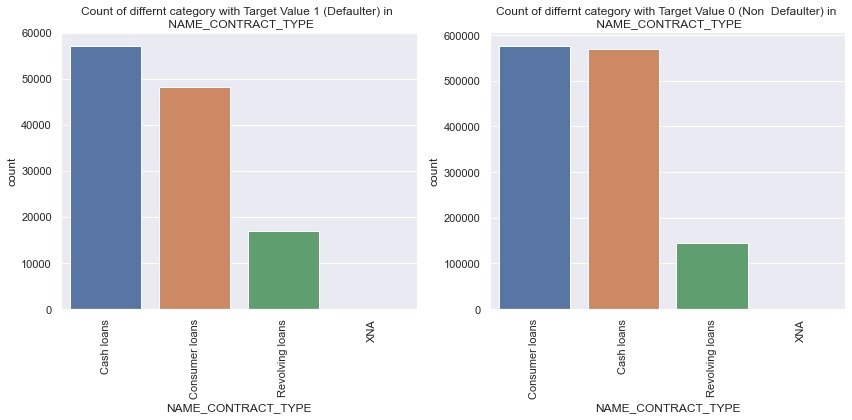

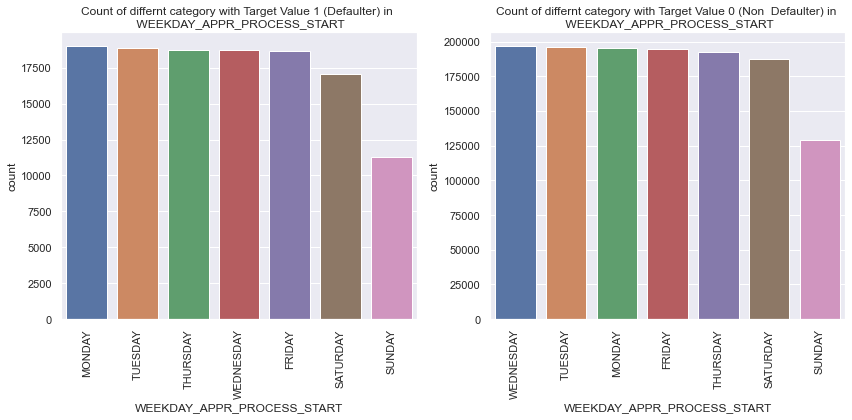

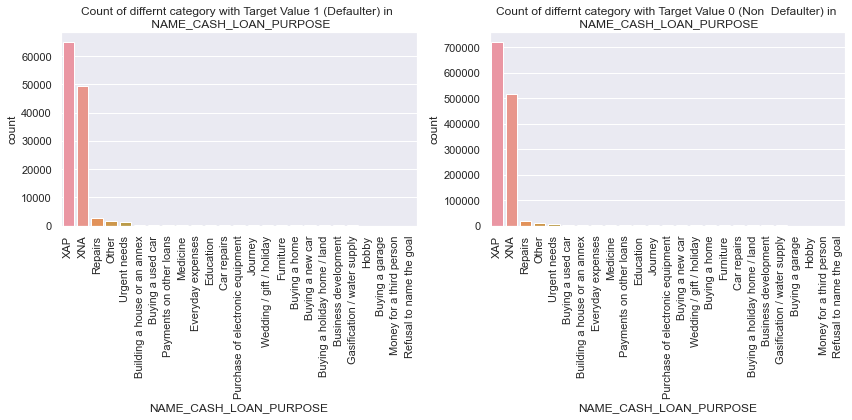

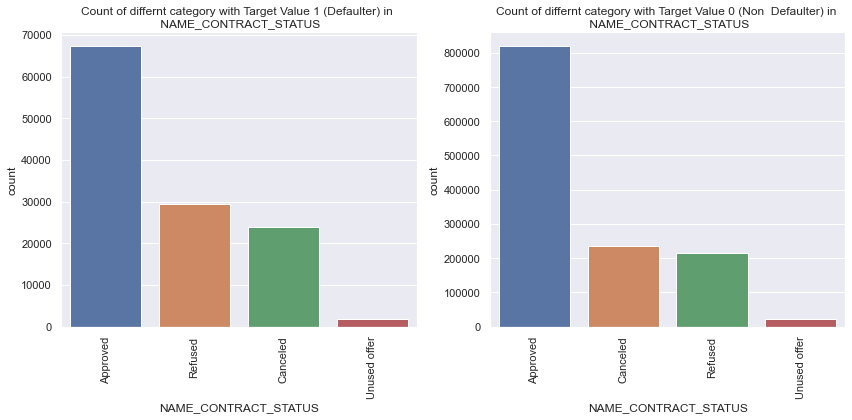

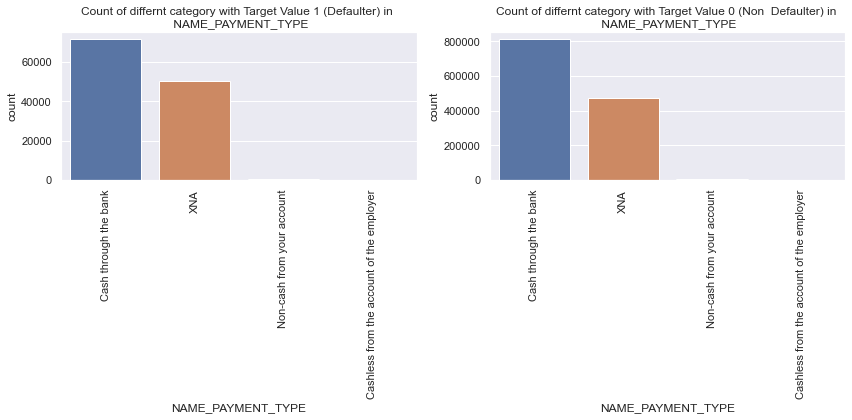

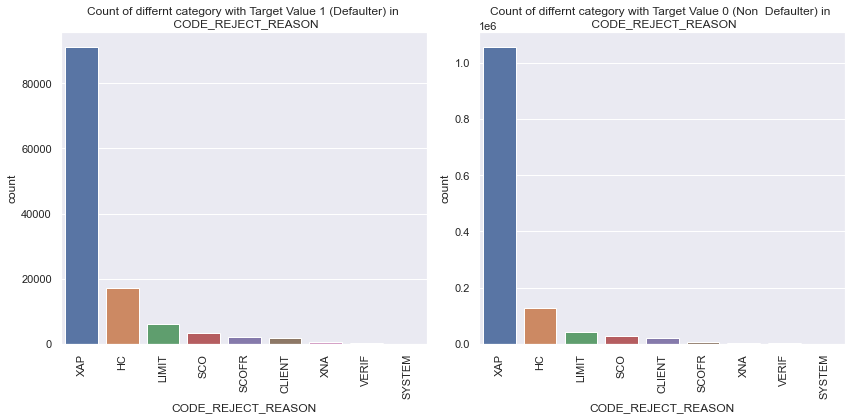

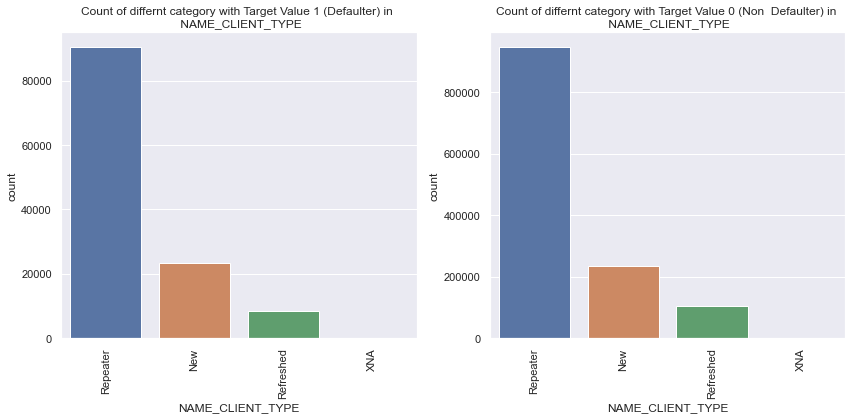

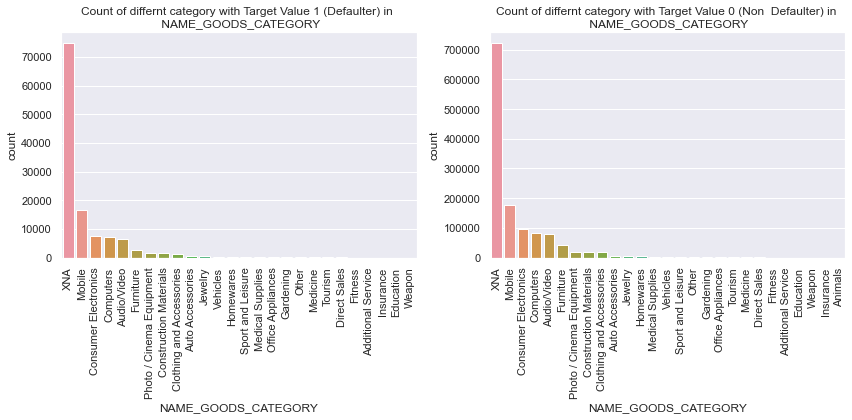

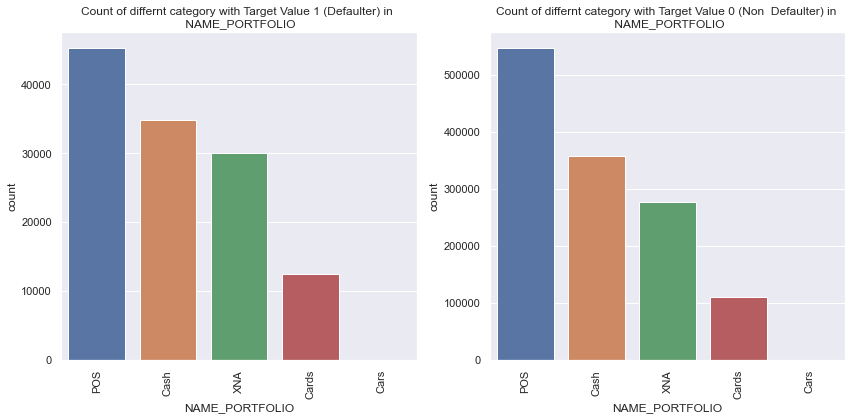

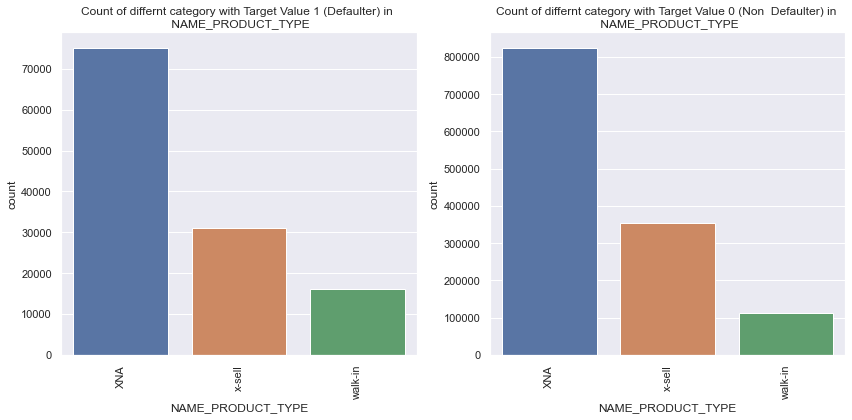

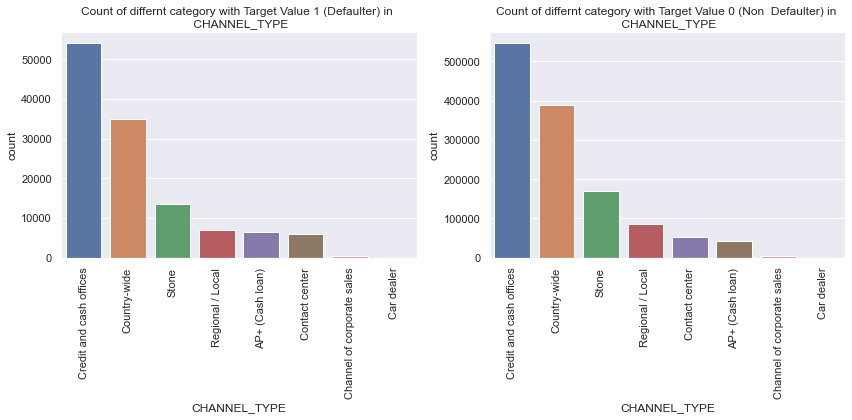

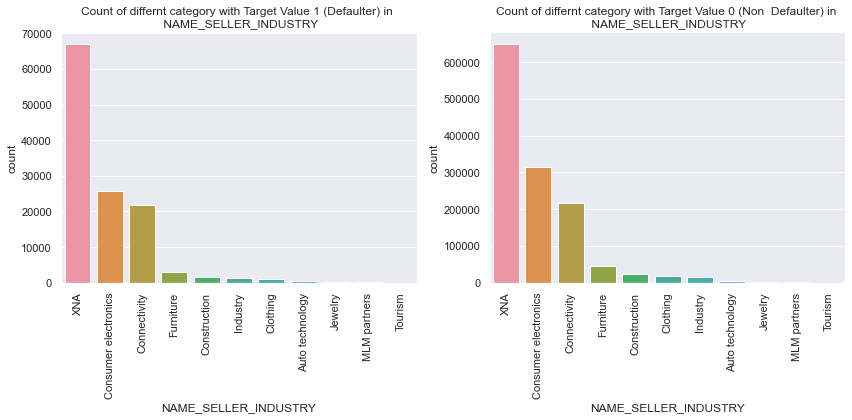

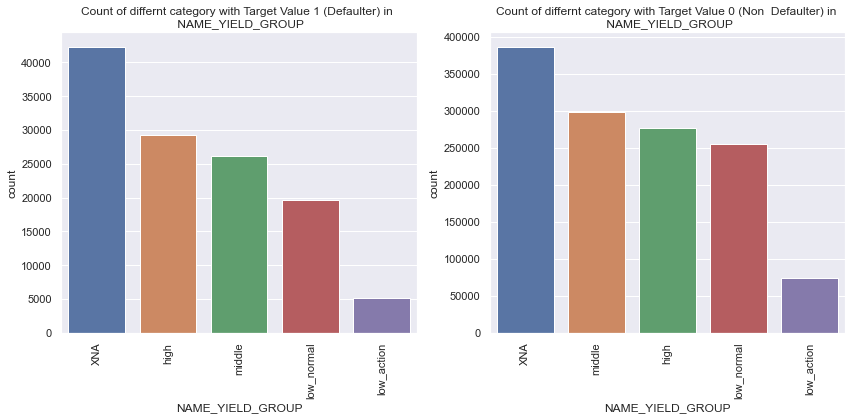

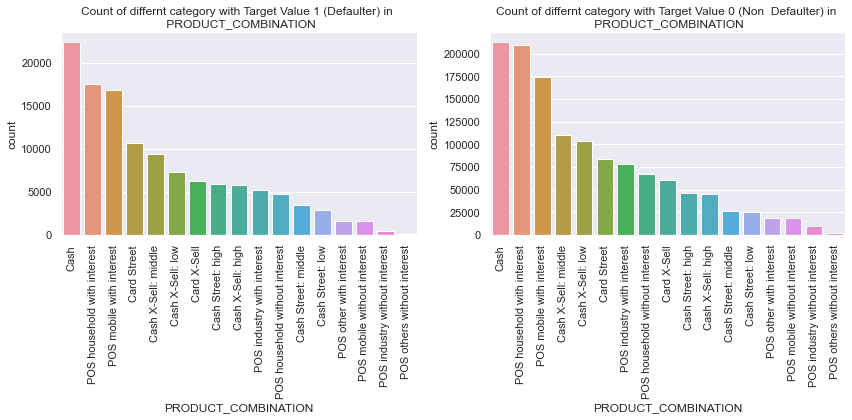

In [130]:
for i in prev_cat_col:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.countplot(x = i, data = prev_app_data1
             ,order = prev_app_data1[i].value_counts().index)
    plt.title(f"Count of differnt category with Target Value 1 (Defaulter) in \n {i}")
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    sns.countplot(x = i, data = prev_app_data0
             ,order = prev_app_data0[i].value_counts().index)
    plt.title(f"Count of differnt category with Target Value 0 (Non  Defaulter) in \n {i}")
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

#### After Examining each grah Here are the findings
- Defaulter seems to have more consumer loans than Non Defaulter, while for cash loans even the difference is litle it is opposite of consumer loans
- For week day application process start it is same for both Defaulter or Non Defaulter
- For Name cash Purpose also there isn't any visible difference between both target.
- For Contact Status, for defaulter applicant seems to have more Refused and cancelled than non-defaulter
- For payment type, all category are similar for both Defaulter and Non-Defaulter
- Reject Reason code also seems to have similar count %  for both defaulter and non defaulter.
- Client type also seems to have similar count %  for both defaulter and non defaulter.
- Goods_Category, Name_Type, Name_Portfolio, Product_Type, Channel_Type, Seller_industry, Name_yield have similar count %  for both defaulter and non defaulter. In my opinion they should not give any good inication of Target Variable

#### For Next Step of Analysis we will be using :
['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']

#### Univariate Analysis of Numerical Columns

In [131]:
prev_num_col = ['HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'CNT_PAYMENT']

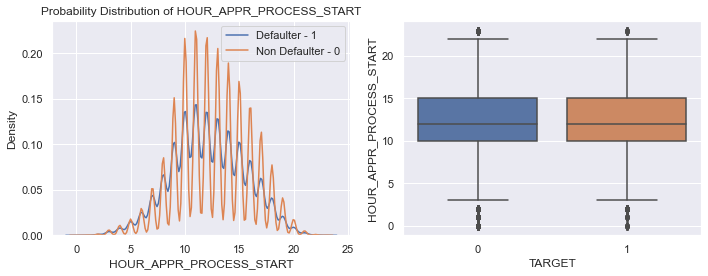

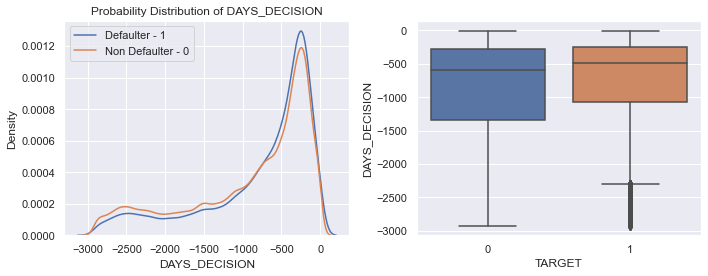

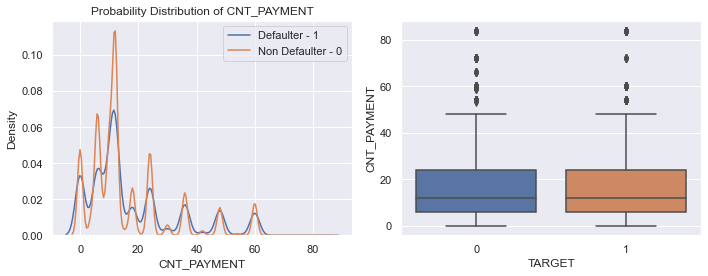

In [142]:
for i in prev_num_col:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title(f'Probability Distribution of {i}')
    sns.distplot(a=prev_app_data1[i], label='Defaulter - 1 ', hist=False)
    sns.distplot(a=prev_app_data0[i], label='Non Defaulter - 0', hist=False)
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(y = i, x = 'TARGET', data = merge_app_prev)
    plt.tight_layout()
    plt.show()

#### Finding from above Distribution
- Hour Approx process start is too random, and does not provide any clear indication about target variable.
- Days decision has similar distribution for both category.
- For cnt_payment we can see Defaulter and Non Defaulter seems have peak at same values but for Non-Defaulter it is high.

### Bivariate Analysis :

NAME_CONTRACT_TYPE & NAME_CONTRACT_STATUS

In [133]:
pd.pivot_table(index = 'NAME_CONTRACT_TYPE', columns= 'NAME_CONTRACT_STATUS', values = 'TARGET', data = merge_app_prev)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,0.075516,0.088401,0.125810,0.092593
Consumer loans,0.073853,0.128668,0.101350,0.082337
Revolving loans,0.090343,0.109254,0.129050,0.000000
XNA,NaN,0.197183,0.241379,NaN


Here we can see Applicants that has refused from loan and of XNA Contract type are more likely to default on their loan.